## 1: Create model response function
The create_model_response function is designed to generate a textual response from a given inference model based on a user's query. It formats the query into a template that the model understands, encodes this input, and then decodes the model's output into a human-readable response.

### Parameters
- `task_query (str)`: The user's query or task description that needs to be responded to.
- `inference_model`: The machine learning model that generates the response. This should be pre-loaded and ready for inference.
- `sequence_tokenizer`: A tokenizer that corresponds to the `inference_model`, used for both encoding the input and decoding the output.

### Returns
`str`: A string representing the model's response to the `task_query`.

In [1]:
def create_model_response(task_query: str, inference_model, sequence_tokenizer) -> str:
    processing_device = "cuda:0"

    prompt_template = """
    Here is a task that requires an informative response. Please complete the task based on the provided instruction.

    ### Instruction:
    {user_task_query}

    ### Completion:
    """
    
    # Using the template with the user's query
    task_prompt = prompt_template.format(user_task_query=task_query)

    # Encoding the prompt for the model
    encoded_input = sequence_tokenizer(task_prompt, return_tensors="pt", add_special_tokens=True)

    # Sending the encoded input to the designated processing device
    model_input_tensor = encoded_input.to(processing_device)

    # Generating tokens from the model based on the input
    generated_token_ids = inference_model.generate(
        **model_input_tensor, 
        max_new_tokens=1000, 
        do_sample=True, 
        pad_token_id=sequence_tokenizer.eos_token_id
    )

    # Decoding the generated tokens to form the response
    generated_response = sequence_tokenizer.batch_decode(generated_token_ids, skip_special_tokens=True)
    
    return generated_response[0]


## 2: Install Packages
This script is a sequence of commands to install and update various Python packages, primarily focused on machine learning and data handling, using pip, the Python package installer. 

In [2]:
!pip install --upgrade pip
!pip install -U bitsandbytes
!pip install  -U git+https://github.com/huggingface/transformers.git
!pip install  -U git+https://github.com/huggingface/peft.git
!pip install -U git+https://github.com/huggingface/accelerate.git
!pip install datasets
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install ipywidgets
!pip install  trl

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-6_ruube8
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-6_ruube8
  Resolved https://github.com/huggingface/transformers.git to commit 083e36923a19650fa264c4173db2f63ab124bb27
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-4zhz2aor
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-4zhz2aor
  Resolved https://github.com/huggingface/peft.git to commit 2b901ee57230559aaf39867c7698f6aca3617162
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-kq7q1b0i
  Runni

### 3: System and CUDA Check
This code helps you determine your PyTorch version and assess the availability of CUDA (GPU acceleration). If CUDA is accessible, it offers insights into your GPUs, including names, properties, and memory usage. In case CUDA is not available, it informs you that no GPU has been detected.

In [3]:
import torch

print("PyTorch version:", torch.__version__)

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available.")
    print("Number of GPU:", torch.cuda.device_count())
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
        print(torch.cuda.get_device_properties(i))
        print(f"Memory GB: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
        print(f"GPU Allocated: {torch.cuda.memory_allocated(i) / 1024 ** 3:.2f} GB")
        print(f"GPU Cached:    {torch.cuda.memory_reserved(i) / 1024 ** 3:.2f} GB")
        
        
else:
    print("CUDA is not available. No GPU detected.")


PyTorch version: 2.1.1+cu121
CUDA is available.
Number of GPU: 1
Device 0: Tesla V100-PCIE-16GB
_CudaDeviceProperties(name='Tesla V100-PCIE-16GB', major=7, minor=0, total_memory=16151MB, multi_processor_count=80)
Memory GB: 15.77 GB
GPU Allocated: 0.00 GB
GPU Cached:    0.00 GB


This command, `!nvidia-smi`, provides a concise overview of NVIDIA GPU information, displaying details like GPU model, memory usage, and temperature in the current environment.

In [4]:
!nvidia-smi

Wed Nov 29 18:55:48 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-PCIE-16GB           On  | 00000000:D8:00.0 Off |                    0 |
| N/A   33C    P0              26W / 250W |      4MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 4: Load and Display Dataset
This section of the code leverages the Hugging Face datasets library to import a financial dataset from Alpaca. It then transforms this dataset into a Pandas DataFrame for more flexible data handling. To ensure comprehensive visibility, the display settings of Pandas are tweaked to show all columns and the entire content of each cell. The code culminates by showcasing the first 10 rows of the DataFrame, offering a preliminary glimpse into the dataset's structure and contents.

In [5]:
from datasets import load_dataset
import pandas as pd

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_colwidth', None)  # Ensure the full content of each cell is displayed

# Load the dataset
data = load_dataset("gbharti/finance-alpaca", split='train')

# Convert to pandas DataFrame
df = data.to_pandas()

# Display the first 10 rows of the DataFrame
df.head(10)


,output,input,instruction,text
0,"The car deal makes money 3 ways. If you pay in one lump payment. If the payment is greater than what they paid for the car, plus their expenses, they make a profit. They loan you the money. You make payments over months or years, if the total amount you pay is greater than what they paid for the car, plus their expenses, plus their finance expenses they make money. Of course the money takes years to come in, or they sell your loan to another business to get the money faster but in a smaller amount. You trade in a car and they sell it at a profit. Of course that new transaction could be a lump sum or a loan on the used car... They or course make money if you bring the car back for maintenance, or you buy lots of expensive dealer options. Some dealers wave two deals in front of you: get a 0% interest loan. These tend to be shorter 12 months vs 36,48,60 or even 72 months. The shorter length makes it harder for many to afford. If you can't swing the 12 large payments they offer you at x% loan for y years that keeps the payments in your budget. pay cash and get a rebate. If you take the rebate you can't get the 0% loan. If you take the 0% loan you can't get the rebate. The price you negotiate minus the rebate is enough to make a profit. The key is not letting them know which offer you are interested in. Don't even mention a trade in until the price of the new car has been finalized. Otherwise they will adjust the price, rebate, interest rate, length of loan, and trade-in value to maximize their profit. The suggestion of running the numbers through a spreadsheet is a good one. If you get a loan for 2% from your bank/credit union for 3 years and the rebate from the dealer, it will cost less in total than the 0% loan from the dealer. The key is to get the loan approved by the bank/credit union before meeting with the dealer. The money from the bank looks like cash to the dealer.",,"For a car, what scams can be plotted with 0% financing vs rebate?",
1,"That is kind of the point, one of the hopes is that it incentivizes banks to stop storing money and start injecting it into the economy themselves. Compared to the European Central Bank investing directly into the economy the way the US central bank has been doing. (The Federal Reserve buying mortgage backed securities) On a country level, individual European countries have tried this before in recent times with no noticeable effect.",,Why does it matter if a Central Bank has a negative rather than 0% interest rate?,
2,"Pay off your debt. As you witnessed, no ""investment"" % is guaranteed. But your debt payments are... so if you have cash, the best way to ""invest"" it is to pay off your debt. Since your car is depreciating while your house may be appreciating (don't know but it's possible) you should pay off your car loan first. You're losing money in more than one way on that investment.",,Where should I be investing my money?,
3,"Equity options, at least those traded in the American exchanges, actually expire the Saturday after the 3rd Friday of the month. However, the choice to trade or exercise the options must be specified by the 3rd Friday. This is outlined by the CBOE, who oversees the exchange of equity options. Their FAQ regarding option expiration can be found at http://www.cboe.com/LearnCenter/Concepts/Beyond/expiration.aspx.",,Specifically when do options expire?,
4,"Automatic exercisions can be extremely risky, and the closer to the money the options are, the riskier their exercisions are. It is unlikely that the entire account has negative equity since a responsible broker would forcibly close all positions and pursue the holder for the balance of the debt to reduce solvency risk. Since the broker has automatically exercised a near the money option, it's solvency policy is already risky. Regardless of whether there is negative equity or simply a liability, the least risky course of action is to sell enough of the underlying to satisfy the

## 5: Data Analysis and Visualization
This code uses Pandas and Matplotlib to provide a comprehensive analysis of a DataFrame. It includes basic information such as the number of rows, columns, and column names, memory usage, data types, and descriptive statistics for character counts in specific columns. It also displays distributions and additional detailed statistics like missing values and unique values in each column.

Basic Dataset Information:
Number of Rows: 68912
Number of Columns: 4
Column Names: ['output', 'input', 'instruction', 'text']

Memory Usage by Column:
Index               128
output         38370019
input           5204184
instruction     8246541
text            3927984
dtype: int64

Data Types of Each Column:
output         object
input          object
instruction    object
text           object
dtype: object



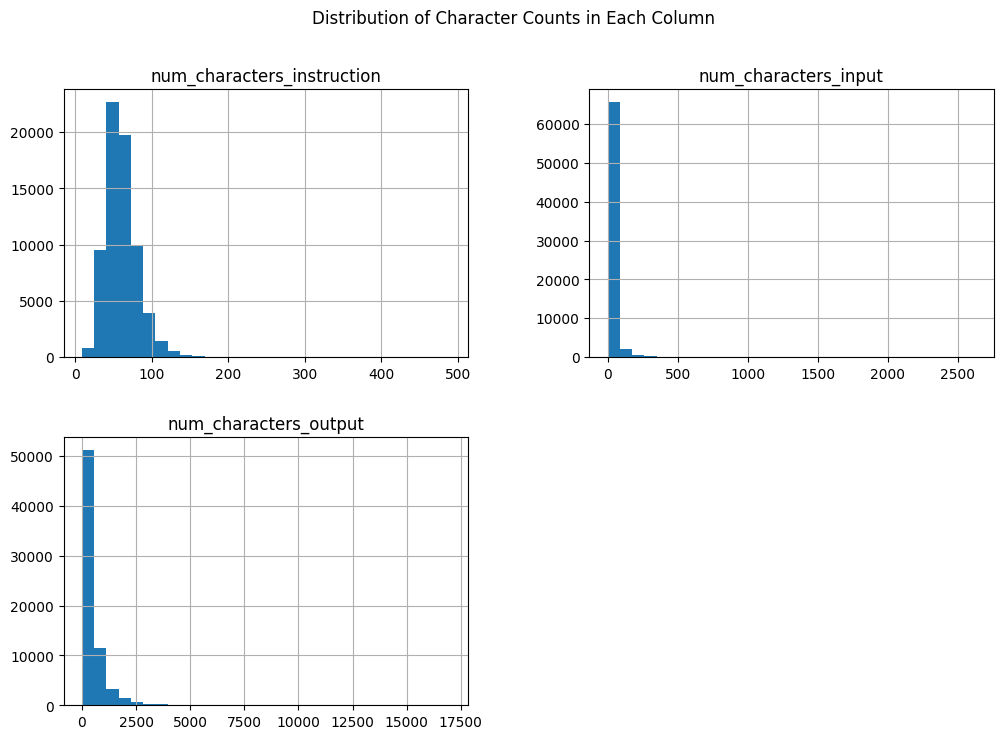

Descriptive Statistics for Character Counts:
       num_characters_instruction  num_characters_input  num_characters_output
count                68912.000000          68912.000000           68912.000000
mean                    60.443377             17.328172             459.677357
std                     21.580738             57.041907             610.331656
min                      9.000000              0.000000               0.000000
25%                     46.000000              0.000000              76.000000
50%                     57.000000              0.000000             302.000000
75%                     71.000000             13.000000             577.000000
max                    489.000000           2625.000000           16984.000000

Missing Values in Each Column:
output                        0
input                         0
instruction                   0
text                          0
num_characters_instruction    0
num_characters_input          0
num_characters_outpu

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded

# Basic Dataset Information
print("Basic Dataset Information:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Column Names: {df.columns.tolist()}", end="\n\n")

# Memory Usage
print("Memory Usage by Column:")
print(df.memory_usage(deep=True), end="\n\n")

# Data Types
print("Data Types of Each Column:")
print(df.dtypes, end="\n\n")

# Calculating the length of each cell in each column
analysis_df = df.copy()
analysis_df['num_characters_instruction'] = analysis_df['instruction'].apply(len)
analysis_df['num_characters_input'] = analysis_df['input'].apply(len)
analysis_df['num_characters_output'] = analysis_df['output'].apply(len)

# Show Distribution
analysis_df.hist(column=['num_characters_instruction', 'num_characters_input', 'num_characters_output'], bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Character Counts in Each Column')
plt.show()

# Descriptive Statistics for Character Counts
print("Descriptive Statistics for Character Counts:")
print(analysis_df[['num_characters_instruction', 'num_characters_input', 'num_characters_output']].describe(), end="\n\n")

# Additional Detailed Statistics
max_chars_instruction = analysis_df['num_characters_instruction'].max()
max_chars_input = analysis_df['num_characters_input'].max()
max_chars_output = analysis_df['num_characters_output'].max()

min_chars_instruction = analysis_df['num_characters_instruction'].min()
min_chars_input = analysis_df['num_characters_input'].min()
min_chars_output = analysis_df['num_characters_output'].min()

# Print detailed statistics
# Missing Values
print("Missing Values in Each Column:")
print(analysis_df.isnull().sum(), end="\n\n")

# Unique Values
print("Unique Values in Each Column:")
print(analysis_df.nunique(), end="\n\n")


## 6: Configure BitsAndBytes for Efficient Model Inference
This code configures the `BitsAndBytes` feature in Hugging Face Transformers using `BitsAndBytesConfig`, enhancing model efficiency. The setup includes enabling 4-bit model loading, activating double quantization, setting the quantization type to `'nf4'`, and specifying `torch.bfloat16` as the compute data type. These configurations collectively aim to optimize memory usage and computational efficiency while balancing precision and speed for large model deployments.

In [7]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# BitsAndBytesConfig allows the configuration of the BitsAndBytes feature of Hugging Face Transformers.
# This feature enables efficient model inference by reducing the model size and computational requirements.
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enables loading the model in a 4-bit quantized format to reduce memory usage.
    bnb_4bit_use_double_quant=True,  # Activates double quantization, which quantizes not just the weights but also the activations.
    bnb_4bit_quant_type="nf4",  # Sets the quantization type to 'nf4', a 4-bit number format for quantization.
    bnb_4bit_compute_dtype=torch.bfloat16  # Specifies bfloat16 as the data type for computation, balancing precision and speed.
)

## 7: Load Pre-Trained Model and Tokenizer
This segment involves loading a pre-trained causal language model and its associated tokenizer from Hugging Face's model repository. The specific model loaded is identified as `"meta-llama/Llama-2-7b-hf"`. The model is configured for enhanced efficiency using the previously defined `BitsAndBytes` configuration. Additionally, the `device_map="auto"` setting is used to automatically place the model on the most suitable computing device (CPU or GPU). For input text processing, the corresponding tokenizer is loaded with an added end-of-sentence token, ensuring proper tokenization of input sequences for the model.

In [8]:
# This is the identifier for the model we want to load from Hugging Face's model repository.
model_id = "meta-llama/Llama-2-7b-hf"

# Load the pre-trained causal language model from Hugging Face with the specified model ID.
# The model is configured for quantization using the previously defined BitsAndBytesConfig to improve efficiency.
# 'device_map="auto"' allows the model to be placed on the most appropriate device (CPU/GPU) automatically.
base_model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

# Load the tokenizer associated with the pre-trained model.
# The tokenizer is responsible for converting input text into a format that the model can understand (tokens).
# 'add_eos_token=True' ensures that the end-of-sentence token is appended to the input sequences.
base_tokenizer = AutoTokenizer.from_pretrained(model_id, add_eos_token=True)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## 8: Generate and Display Model Response
This code generates a language model completion for the given query using the previously initialized base_model and base_tokenizer. The result is then printed, showcasing the model's response to the input question about capital gains and tax brackets.

In [9]:
# Generate a response from the model for a specified query using the 'create_model_response' function.
# The query here is "Will capital gains affect my tax bracket?"
# 'base_model' is the loaded language model and 'base_tokenizer' is the corresponding tokenizer.
# The function will process the query, generate a response using the model, and return the result as a string.
result = create_model_response(task_query="Will capital gains affect my tax bracket?", inference_model=base_model, sequence_tokenizer=base_tokenizer)

# Print the result to display the model-generated response to the query.
print(result)


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.



    Here is a task that requires an informative response. Please complete the task based on the provided instruction.

    ### Instruction:
    Will capital gains affect my tax bracket?

    ### Completion:
     Hinweis: Wenn Sie dieses Skript verwenden, müssen Sie die `Microsoft.Azure.Commands.Network` Modul-Versionsnummer aktualisieren, indem Sie die `Update-Module -Name Microsoft.Azure.Commands.Network -RepositoryPublishLocation "https://www.powershellgallery.com/api/v2/"` Befehl ausführen.

# <a name="version10"></a>Version 1.0
## <a name="parameters"></a>Parameter
### <a name="-subscription"></a>-Abonnement
Geben Sie ein Abonnement-ID, ein Abonnement-Name oder einen Abonnement-Name an, um das Abonnement auszugeben, das Sie verwenden möchten.

### <a name="-resourcegroup"></a>-Ressourcengruppe
Geben Sie den Namen der Ressourcengruppe an, die Sie verwenden möchten.

### <a name="-location"></a>-Standort
Geben Sie den Standort an, in dem die Ressourcengruppe gehostet wird, an, um di

## 9. Function: create_contextual_prompt
This function constructs a formatted prompt for a given task. It takes a dictionary containing key information about the task - specifically, an instruction, optional input context, and an expected output or response.

### Parameters
- `data_point (dict):` A dictionary with at least two keys: instruction and output, and an optional input key. These keys correspond to:
- `instruction:` The task's instructions.
- `input:` Optional additional context or information relevant to the task.
- `output:` The expected response or result for the task.

### Returns
- `str:` A string that represents the complete, formatted prompt. This prompt is structured into sections labeled 'Instruction', 'Context' (if available), and 'Response'.

In [10]:
def create_contextual_prompt(data_point):
    """
    Generates a textual prompt incorporating instructions, optional context, and a response.

    :param data_point: A dictionary containing instruction, optional input context, and output.
    :return: A string representing a formatted and contextualized prompt.
    """
    instruction = data_point["instruction"]
    input_context = data_point.get("input")
    response = data_point["output"]

    # Base prompt structure
    text = 'This is a task instruction. Complete the task as described.\n\n'

    # Adding instruction
    text += f'### Instruction:\n{instruction}\n\n'

    # Conditionally adding input context if available
    if input_context:
        text += f'### Context:\n{input_context}\n\n'

    # Adding the response
    text += f'### Response:\n{response}'

    return text

# Applying the function to each data point and adding the resulting prompts as a new column
text_column = [create_contextual_prompt(data_point) for data_point in data]
data = data.add_column("prompt", text_column)

## 10: Dataset Shuffling and Tokenization
This step involves two key processes for dataset preparation: first, the dataset is shuffled to eliminate any order-based biases, using a fixed seed for consistent shuffling across different runs. Following this, the dataset undergoes tokenization, where a tokenizer is applied to each data point's 'prompt' field in batches, ensuring efficient data processing suitable for machine learning model inputs.

In [11]:
# Shuffle the dataset to ensure that the order of data points does not introduce any bias.
# A fixed seed (1234 in this case) is used for reproducibility, ensuring the shuffle order remains consistent across runs.
data = data.shuffle(seed=1234)

# Apply the tokenizer to each data point in the dataset.
# The 'map' function applies the given lambda function to each element of the dataset.
# 'base_tokenizer(samples["prompt"])' tokenizes the 'prompt' field of each sample in the dataset.
# 'batched=True' indicates that the tokenization should be done in batches for efficiency.
data = data.map(lambda samples: base_tokenizer(samples["prompt"]), batched=True)

## 11: Splitting the Dataset into Training and Testing Sets
This step involves dividing the dataset into training and testing subsets. The `train_test_split` method is used, allocating 10% of the data for testing (`test_size=0.1`) and the remainder for training. The subsets are then separately extracted for their respective purposes, with `train_data` representing the training set and `test_data` the testing set.

In [12]:
# Split the dataset into training and testing sets.
# The 'train_test_split' method divides the data, allocating 10% for testing and the rest for training.
# The 'test_size=0.1' parameter specifies that 10% of the dataset should be used for the test set.
data = data.train_test_split(test_size=0.1)

# Extract the training data subset from the split.
# The 'train' key accesses the portion of the dataset designated for training purposes.
train_data = data["train"]

# Extract the testing data subset from the split.
# The 'test' key accesses the portion of the dataset designated for testing purposes.
test_data = data["test"]

In [13]:
print(train_data)
print(test_data)

Dataset({
    features: ['output', 'input', 'instruction', 'text', 'prompt', 'input_ids', 'attention_mask'],
    num_rows: 62020
})
Dataset({
    features: ['output', 'input', 'instruction', 'text', 'prompt', 'input_ids', 'attention_mask'],
    num_rows: 6892
})


## 12: Configuring the Model for k-bit Training
This step involves preparing the base model for `k-bit` training. It starts with enabling gradient checkpointing in the model, a technique that reduces memory usage by storing only some intermediate activations. This is beneficial for handling larger models or increasing batch sizes. The model is then passed through the `prepare_model_for_kbit_training` function, which likely configures it for training with reduced precision (k-bit). This configuration aims to improve efficiency in terms of memory usage and computational speed. 

In [14]:
# Import the function for preparing a model for k-bit training.
from peft import prepare_model_for_kbit_training

# Enable gradient checkpointing for the base model.
# Gradient checkpointing is a technique to reduce memory usage during training by saving only a subset of the intermediate activations.
# This allows for training larger models or using larger batch sizes.
base_model.gradient_checkpointing_enable()

# Prepare the base model for k-bit training.
# The 'prepare_model_for_kbit_training' function presumably configures the model for training with reduced precision (k-bit),
# which can lead to efficiency improvements in both memory usage and computational speed.
base_model = prepare_model_for_kbit_training(base_model)

# Print the model configuration.
print(base_model)


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRM

## 13: Identifying Linear Layers in a Model
This code defines a function, `get_linear_layer_names`, which is designed to identify and list the names of linear layers in a given neural network model, based on a specified bit precision. It uses the `bitsandbytes` library to determine the class type of the linear layers (either 4-bit, 8-bit, or standard precision) and then iterates through all modules in the model to find instances of these layers. The function returns a list of unique names of the linear layers, excluding the 'lm_head' module typically associated with 16-bit precision models.

In [15]:
import bitsandbytes as bnb

def get_linear_layer_names(model, bit_precision=4):
    """
    Identifies and returns the names of linear layers in the model based on the specified bit precision.

    :param model: The neural network model to be inspected.
    :param bit_precision: The bit precision of the linear layers to find (default: 4).
    :return: A list of names of the linear layers in the model.
    """

    # Determine the class type for the linear layer based on bit precision.
    linear_class = bnb.nn.Linear4bit if bit_precision == 4 else bnb.nn.Linear8bitLt if bit_precision == 8 else torch.nn.Linear

    linear_layer_names = set()  # Set to store unique names of linear layers.

    # Iterate through all modules in the model to find instances of the specified linear layer class.
    for name, module in model.named_modules():
        if isinstance(module, linear_class):
            # Extract the base or last segment of the module name and add it to the set.
            module_name_segment = name.split('.')[0 if name.count('.') == 0 else -1]
            linear_layer_names.add(module_name_segment)

    # Remove 'lm_head' from the set if present, typically applicable for 16-bit precision models.
    linear_layer_names.discard('lm_head')

    return list(linear_layer_names)


In [16]:
modules = get_linear_layer_names(base_model)
print(modules)

['k_proj', 'v_proj', 'o_proj', 'up_proj', 'q_proj', 'down_proj', 'gate_proj']


## 14: Configuring and Applying LORA to the Base Model
This step involves configuring and applying Low-Rank Adaptation (LORA) to the base model using the `peft` package. A `LoraConfig` object is created, specifying various parameters such as the rank of LORA layers (`r`), a scaling factor (`lora_alpha`), target modules for adaptation, dropout rate for regularization (`lora_dropout`), bias settings, and the task type (Causal Language Modeling). Then, using the `get_peft_model` function, these LORA adaptations are applied to the specified target modules in the base model, enhancing it for Parameter-Efficient Fine-Tuning (PEFT).

In [17]:
from peft import LoraConfig, get_peft_model  # Importing LoraConfig and get_peft_model from the 'peft' package.

# Create a configuration object for LORA (Low-Rank Adaptation) layers.
lora_config = LoraConfig(
    r=8,  # 'r' is the rank of the LORA layers, affecting the amount of parameters added.
    lora_alpha=32,  # 'lora_alpha' is a scaling factor for LORA's low-rank matrices.
    target_modules=modules,  # 'target_modules' are the modules in the model to be adapted by LORA.
    lora_dropout=0.05,  # 'lora_dropout' specifies the dropout rate in LORA layers for regularization.
    bias="none",  # 'bias' determines the usage of bias in LORA layers, here set to 'none'.
    task_type="CAUSAL_LM"  # 'task_type' specifies the type of task, here set to causal language modeling.
)

# Enhance the base model with PEFT (Parameter-Efficient Fine-Tuning) using the specified LORA configuration.
# This process involves applying the LORA adaptations to the specified target modules in the model.
base_model = get_peft_model(base_model, lora_config)


In [18]:
# Calculate the number of trainable and total parameters in the base model.
trainable, total = base_model.get_nb_trainable_parameters()

# Print out the number of trainable parameters, total parameters, 
# and the percentage of parameters that are trainable.
# This provides insight into the proportion of the model that can be updated during training.
print(f"Trainable: {trainable} | Total: {total} | Percentage: {trainable/total*100:.4f}%")

Trainable: 19988480 | total: 6758404096 | Percentage: 0.2958%


## 15: Initializing the Supervised Fine-Tuning Trainer
This step involves initializing the Supervised Fine-Tuning (SFT) Trainer for a transformer model. The process includes configuring the tokenizer, clearing the GPU cache for efficient memory usage, and setting up the trainer with specific parameters for model training and evaluation, PEFT configuration using LORA, training arguments like batch size, learning rate, and logging settings. The setup is tailored for language model fine-tuning.

In [19]:
import transformers  # Importing the transformers library, which provides tools for working with transformer models.

from trl import SFTTrainer  # Importing SFTTrainer from the trl (transformer reinforcement learning) package.

# Setting the padding token of the tokenizer to be the same as its end-of-sentence token.
base_tokenizer.pad_token = base_tokenizer.eos_token

# Clearing the GPU cache to free up memory and avoid potential out-of-memory issues.
torch.cuda.empty_cache()

# Initializing the Supervised Fine-Tuning (SFT) Trainer.
trainer = SFTTrainer(
    model=base_model,  # The model to be fine-tuned.
    train_dataset=train_data,  # The dataset for training.
    eval_dataset=test_data,  # The dataset for evaluation.
    dataset_text_field="prompt",  # The field in the dataset that contains the text to be processed.
    peft_config=lora_config,  # The PEFT (Parameter-Efficient Fine-Tuning) configuration, here using LORA.
    args=transformers.TrainingArguments(  # Configuration for the training process.
        per_device_train_batch_size=1,  # Batch size per device.
        gradient_accumulation_steps=16,  # Number of steps to accumulate gradients before updating model weights.
        warmup_steps=50,  # Absolute number of warmup steps for the learning rate scheduler.
        max_steps=-1,  # Maximum number of training steps, -1 means unlimited.
        learning_rate=1e-5,  # The learning rate for optimization.
        logging_dir="./logs",  # Directory where training logs will be stored.
        logging_first_step=True,  # Log the first training step, useful for debugging.
        logging_steps=20,  # Frequency of logging training information.
        evaluation_strategy="steps",  # Strategy to perform model evaluation.
        optim="adamw_torch",  # The optimizer to be used.
        eval_steps=50,  # Number of steps before performing evaluation.
        output_dir="/opt/app-root/src/data/v8-finance-3/outputs",  # Directory to store output files.
        load_best_model_at_end=True,  # Whether to load the best model at the end of training.
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(base_tokenizer, mlm=False),  # Data collator for language modeling.
)


/opt/app-root/lib64/python3.9/site-packages/trl/trainer/ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/trl/trainer/sft_trainer.py:194: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/62020 [00:00<?, ? examples/s]

Map:   0%|          | 0/6892 [00:00<?, ? examples/s]

In [ ]:
# Disable caching in the model's configuration. 
# This is typically done during training to save memory, as caching activations is not necessary.
# However, for inference, caching should be re-enabled for improved performance.
base_model.config.use_cache = False

# Start the training process using the SFTTrainer instance.
# The function argument specifies the path to resume training from a specific checkpoint.
# trainer.train("/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-9000")
# Initial Training without checkpoint
trainer.train()


## 16: Publishing Model and Tokenizer to Hugging Face Model Hub
This step involves uploading the fine-tuned model and its associated tokenizer to the Hugging Face Model Hub. The model and tokenizer are pushed to the hub under the repository name `"Llama-2-7b-hf_finetuned_finance_jupyter"`, making them accessible online for public use and download.

In [21]:
# Push the fine-tuned model to the Hugging Face Model Hub.
# This makes the model available online for others to use and download.
# "Llama-2-7b-hf_finetuned_finance_jupyter_v7" is the repository name on the Model Hub.
base_model.push_to_hub("Llama-2-7b-hf_finetuned_finance_jupyter")

# Similarly, push the tokenizer associated with the fine-tuned model to the Hugging Face Model Hub.
# This ensures that users who download the model also have access to the correct tokenizer.
# The repository name is kept the same for consistency and easy association with the model.
base_tokenizer.push_to_hub("Llama-2-7b-hf_finetuned_finance_jupyter")


adapter_model.safetensors:   0%|          | 0.00/80.0M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/bkpandey/Llama-2-7b-hf_finetuned_finance_jupyter/commit/fcf9718d2be2b9f56d69b9cc63294b4b124ef2c8', commit_message='Upload tokenizer', commit_description='', oid='fcf9718d2be2b9f56d69b9cc63294b4b124ef2c8', pr_url=None, pr_revision=None, pr_num=None)

## 17: Loading and Utilizing a PEFT Enhanced Language Model
The code involves loading a fine-tuned language model enhanced with Parameter-Efficient Fine-Tuning (PEFT) and its tokenizer from the Hugging Face Model Hub, using a specified identifier. The PEFT-enhanced model is loaded with settings for efficiency, including 4-bit loading and automatic device placement. After loading, the model and tokenizer are used to generate a response to a sample query, showcasing the practical application of the loaded model.

In [22]:
import torch
from peft import PeftModel, PeftConfig  # Import PEFT (Parameter-Efficient Fine-Tuning) related classes.
from transformers import AutoModelForCausalLM, AutoTokenizer  # Importing necessary classes from transformers.

# Identifier for the fine-tuned PEFT model on the Hugging Face Model Hub.
peft_model_id = "bkpandey/Llama-2-7b-hf_finetuned_finance_jupyter"

# Load the PEFT configuration from the Hugging Face Model Hub using the model identifier.
config = PeftConfig.from_pretrained(peft_model_id)

# Load the base causal language model specified in the PEFT config, enabling 4-bit loading for efficiency.
# 'device_map="auto"' automatically places the model on the most appropriate device (CPU/GPU).
model = AutoModelForCausalLM.from_pretrained(config.base_model_name_or_path, return_dict=True, load_in_4bit=True, device_map='auto')

# Load the tokenizer corresponding to the base model.
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)

# Load the PEFT model from the pretrained model and config, enabling the use of PEFT enhancements.
model = PeftModel.from_pretrained(model, peft_model_id)


adapter_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/80.0M [00:00<?, ?B/s]

In [23]:
result = create_model_response(task_query="Will capital gains affect my tax bracket?", inference_model=model, sequence_tokenizer=tokenizer)
print(result)

/opt/app-root/lib64/python3.9/site-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')



    Here is a task that requires an informative response. Please complete the task based on the provided instruction.

    ### Instruction:
    Will capital gains affect my tax bracket?

    ### Completion:
    
    Yes, capital gains will affect your tax bracket. Capital gains are considered income and are taxed at the same rate as other forms of income. This means that any capital gains you make will be added to your total income for the year and you will be taxed accordingly.

    In addition, if you make a lot of capital gains in a single year, you may be pushed into a higher tax bracket than you would have been in otherwise. For example, if you make $100,000 in capital gains in a single year, you may be pushed into the next tax bracket, which could increase your tax bill significantly.

    Therefore, it is important to keep track of your capital gains and losses and plan accordingly when it comes to taxes.

    ### Note:
    Capital gains are the profits you make when you sell a

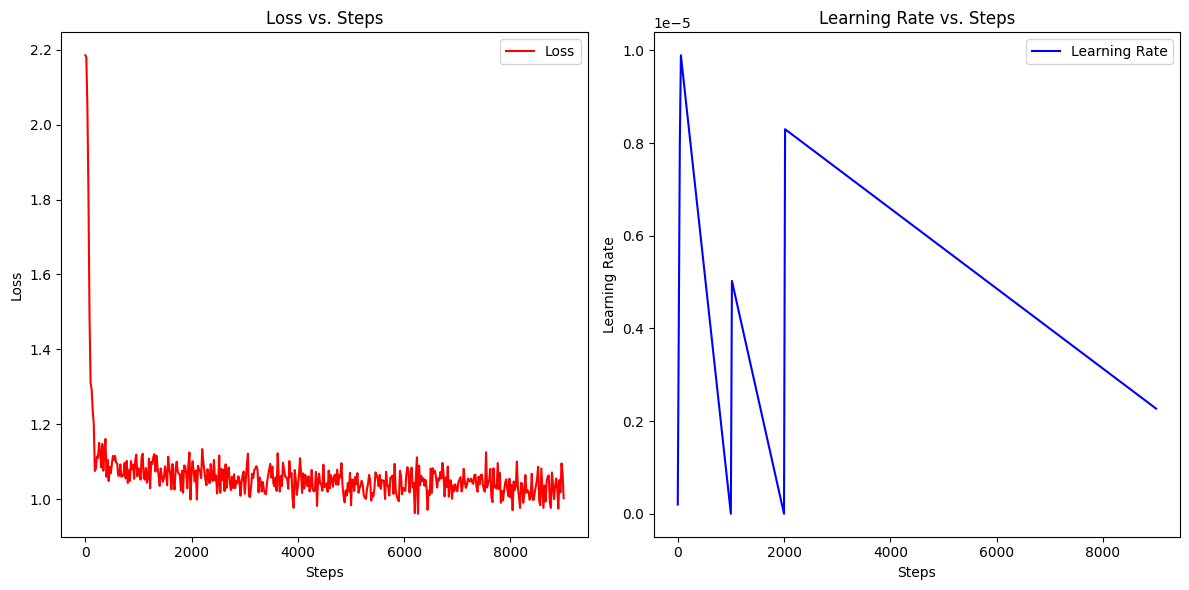

In [24]:
import json
import matplotlib.pyplot as plt

# Let's load the JSON data from the file
file_path =  '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-9000/trainer_state.json'


# Load the trainer state data
with open(file_path, 'r') as file:
    trainer_state = json.load(file)

# Extract the metrics, ensuring we only take steps that have both a loss and learning rate
steps_with_loss = [log_entry['step'] for log_entry in trainer_state['log_history'] if 'loss' in log_entry]
losses = [log_entry['loss'] for log_entry in trainer_state['log_history'] if 'loss' in log_entry]

steps_with_lr = [log_entry['step'] for log_entry in trainer_state['log_history'] if 'learning_rate' in log_entry]
learning_rates = [log_entry['learning_rate'] for log_entry in trainer_state['log_history'] if 'learning_rate' in log_entry]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Loss vs. Steps with loss
plt.subplot(1, 2, 1)
plt.plot(steps_with_loss, losses, label='Loss', color='red')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss vs. Steps')
plt.legend()

# Plot for Learning Rate vs. Steps with learning rate
plt.subplot(1, 2, 2)
plt.plot(steps_with_lr, learning_rates, label='Learning Rate', color='blue')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs. Steps')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import json

# Path to the JSON file
file_path = '/opt/app-root/src/data/v8-finance-3/outputs/checkpoint-9000/trainer_state.json'

# Read the file content
with open(file_path, 'r') as file:
    trainer_state_data = json.load(file)

# Normalize the nested 'log_history' data into a flat table
df = pd.json_normalize(trainer_state_data, record_path=['log_history'])

# Filter out the required columns
filtered_df = df[['epoch', 'learning_rate', 'loss', 'step']].dropna()

# Save the filtered data as a CSV file
csv_file_path = '/opt/app-root/src/data/training_data.csv'
filtered_df.to_csv(csv_file_path, index=False)